In [4]:
import librosa 
import librosa.display
import numpy as np

In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Reference: 
I've never worked with audio data, so Im looking for some reference points: 
https://towardsdatascience.com/recurrent-neural-nets-for-audio-classification-81cb62327990
https://mikesmales.medium.com/sound-classification-using-deep-learning-8bc2aa1990b7
    
Everyone seems quite excited about librosa, so thats where I start 
First sound that has a 1 - whale call presen - train6.aiff 

https://librosa.org/doc/main/tutorial.html

## General Sound Processing Python

General sound processing: https://towardsdatascience.com/audio-deep-learning-made-simple-part-1-state-of-the-art-techniques-da1d3dff2504


Why Melspectograms: https://towardsdatascience.com/audio-deep-learning-made-simple-part-2-why-mel-spectrograms-perform-better-aad889a93505 

# What I know about the dataset 

all samples are 2 seconds  
all samples have a sample rate of 2kHz  
all samples have a label 1 - right whale call, or 0 - not right whale call (other whales marked as 0) 

In [6]:
which_file = 6
filename1 = f'''train{which_file}.aiff'''
filename1
y0, sr0 = librosa.load('data/train/'+filename1,sr=None)
sr=2000

y = librosa.resample(y0, orig_sr=sr0, target_sr=sr)
#Specifying the sampling rate explicitly, since this is given 

In [135]:
y.shape #Makes sense, sampling frequency * 2 sec 
sr # expected frequency 


10000

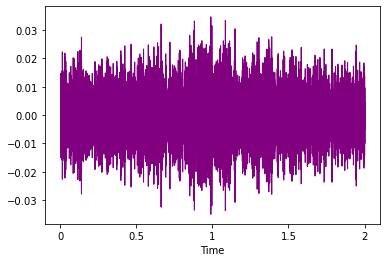

In [136]:
librosa.display.waveshow(y, sr=sr, x_axis='time',color='purple')
#Ok, pretty consistent sound throughout the sample
#Not huge spikes up or silence,and pretty even by the looks of it - with a slight spikiness inthe middle 
#Most of the papers I've looked at actually use the spectogram, and treat it like an image 


In [2]:
import IPython
IPython.display.Audio("data/train/train6.aiff")
#IPython.display.display(IPython.display.Audio("my_audio_file.mp3"))

In [137]:
# #Lets see if we can look at some pitches?? 
# # https://librosa.org/doc/latest/_modules/librosa/core/pitch.html
# pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr)
# plt.plot(pitches)
# plt.show()


# pitches.shape #Yes, all frequencies about a certain level are cut- this is expected, because the true sample rate is low

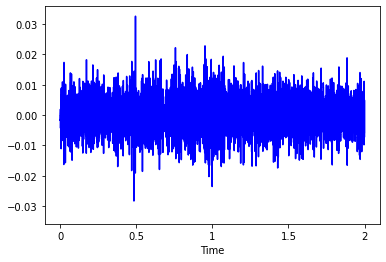

In [7]:
which_file = 8
filename1 = f'''train{which_file}.aiff'''
filename1
y2, sr2 = librosa.load('data/train/'+filename1, sr=None)
librosa.display.waveshow(y2, sr=sr, x_axis='time',color='blue')

In [139]:
# pitches, magnitudes = librosa.core.piptrack(y=y2, sr=sr)
# plt.plot(pitches)
# plt.show()
# #Well, Im not seeing much difference - not surprising, only human:) 

(1025, 8)


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


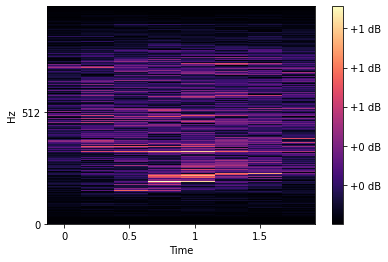

In [8]:
# mfccs = librosa.feature.mfcc(y=y, sr=sr)
# n_fft=256

Y = librosa.stft(y)
#Window length explanation: https://dsp.stackexchange.com/questions/248/how-do-i-optimize-the-window-lengths-in-stft 
#Since we care about the frequency more than the time, we should keep the window default 
print(Y.shape)
librosa.display.specshow(Y,sr=sr,x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
#So generally, Melgrams - closer to the way we hear, perform better. However, these are whales, after all, underwater - will it actually perform better?? Or is what works for humans not ideal in this case? 
#Cat classificator uses mel spectrograms 
# https://en.wikipedia.org/wiki/Whale_vocalization 
#Right whales dont quite sing - they do an "upcall"
#So - humans hear on the melscale. Maybe whales dont. But - in order to visualize better, I want to see the spectrogram better for humans
#Same with amplitude



In [239]:
Y.shape



(1025, 20)

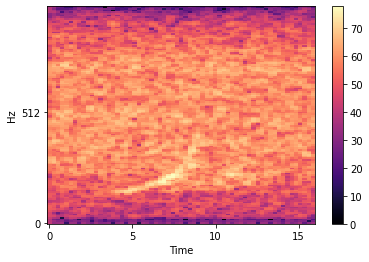

In [260]:
Y1, _ = librosa.magphase(Y ) #Use melscale instead of raw frequency 
Y2 = librosa.feature.melspectrogram(S=Y1,sr=sr,  n_fft=n_fft)
melgram = librosa.amplitude_to_db(Y2, ref=np.min) #Use the minimum of our array as zero: https://librosa.org/doc/main/generated/librosa.amplitude_to_db.html
librosa.display.specshow(melgram, sr=sr, x_axis='time', y_axis='mel', n_fft=n_fft)
plt.colorbar()

#Hm, not sure if better. We shall see?? 
#Lets try the DB correction but without melgram? 
# melgram = librosa.amplitude_to_db(Y, ref=np.min)
# librosa.display.specshow(melgram, sr=sr, x_axis='time', y_axis='mel')
# plt.colorbar()
#no, very bright almost everywhere, and the white hot patch in the middle is not as visible. 
#Back to mel





(array([[1.05565901e-10, 1.54192080e-10, 5.53210341e-11, ...,
         6.74199514e-11, 1.41598480e-10, 7.21222656e-11],
        [1.40417269e-10, 1.95187685e-10, 1.97316086e-12, ...,
         7.21072900e-11, 1.97602387e-10, 1.33032881e-11],
        [6.85360547e-11, 8.10744173e-11, 1.60903505e-11, ...,
         3.55391199e-11, 6.90146341e-11, 4.96015153e-11],
        ...,
        [9.67481665e-12, 9.48512263e-12, 9.21221291e-12, ...,
         2.78254666e-11, 1.45305791e-10, 6.95951234e-10],
        [1.80862766e-11, 9.62768242e-12, 2.53562764e-12, ...,
         2.24946567e-12, 6.80831837e-11, 1.26644265e-10],
        [1.43470655e-11, 1.17557486e-12, 1.18347599e-13, ...,
         4.70030479e-13, 1.61635012e-11, 2.37404895e-12]]),
 array([   0.    ,    7.8125,   15.625 ,   23.4375,   31.25  ,   39.0625,
          46.875 ,   54.6875,   62.5   ,   70.3125,   78.125 ,   85.9375,
          93.75  ,  101.5625,  109.375 ,  117.1875,  125.    ,  132.8125,
         140.625 ,  148.4375,  156.25  ,  1

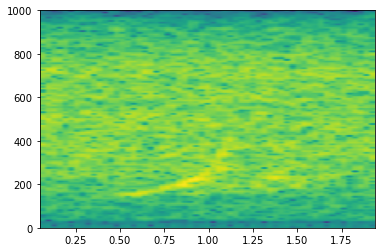

In [263]:
#Another way to do the spectrogram: 
params = {'NFFT':256, 'Fs':sr, 'noverlap':192}
plt.specgram(y, **params)
#Looks pretty similar to me

# Brief Discussion About Sample Rate and Frequency 
https://www.dataq.com/data-acquisition/general-education-tutorials/what-you-really-need-to-know-about-sample-rate.html 

Sample Rate will control what frequencies we can recreate - ours is about 2000 Hz, which means we can recreate about half of that range - so we have to cut it there
Anything else will be reproduced as noise in the dataset 

## Should I still use the default resampling in Librosa? 
Yes - https://librosa.org/blog/2019/07/17/resample-on-load/
We wont see any additional frequencies, but it doesnt hurt, and produces pretties pictures on the spectrograms 
We still sample 4000 times - we should get our 4000 entries. 

## Should I cut the possible frequencies in librosa, even though the sample rate is high? 
Probably 



## What about the Whales 
https://dosits.org/galleries/audio-gallery/marine-mammals/baleen-whales/north-atlantic-right-whale/ 

We will miss some calls, but most of the up calls happen under 1000Hz, so we should be ok 


In [114]:
librosa.fft_frequencies(y, sr=sr)

/var/folders/9k/83m77rxs5835tnj2rh39wf3h0000gn/T/ipykernel_44803/2838611481.py:1: FutureWarning: Pass sr=[ 0.00103223 -0.00014445 -0.00153478 ...  0.00045475  0.00034369
  0.00020632] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.fft_frequencies(y, sr=sr)


ValueError: operands could not be broadcast together with shapes (1025,) (44100,) 